
CNN - based model to classify MNIST data. Hand -written digits (0-9)



- Import the libraries
- Data reparation : Train-test split , specifying the shape of input.
- Build the CNN model
- Train and evaluate the model

In [1]:
# import the library
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D
from keras.layers import Conv2D
from keras import Sequential
import cv2

In [2]:
# load the MNISt dataset
(x_train, y_train) , (x_test , y_test ) = mnist.load_data()

In [3]:
# select one sample
x = x_train[13]
print('The shape of x is :', x.shape)
# resize the image
x = cv2.resize(x, (18,18))

The shape of x is : (28, 28)


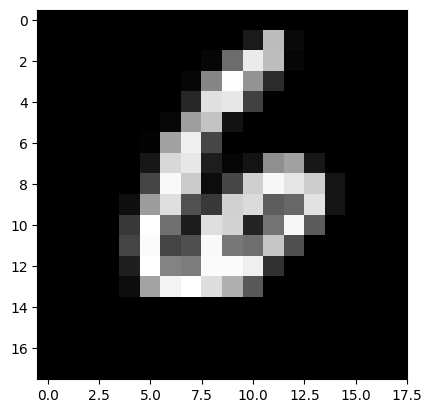

In [4]:
# plot using matplotlib
import matplotlib.pyplot as plt
plt.imshow(x, cmap='gray')
plt.show()

In [5]:
print('The range of pixel vary from 0 to 255')
print(' Pixel value close to 0 is black and pixel value close to 255 is white')
print(x)

The range of pixel vary from 0 to 255
 Pixel value close to 0 is black and pixel value close to 255 is white
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  26 186  10   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   6 107 232 188   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   6 132 250 146  45   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  39 221 228  65   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   7 156 193  18   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   3 160 236  69   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  23 213 228  30   5  19 141 159  23   0   0   0   0]
 [  0   0   0   0   0  68 246 200  12  69 204 244 226 202  21   0   0   0]
 [  0   0   0   0  15 154 220  79  57 206 216  92 102 222  21   0   0   0]
 [  0   0   0   0  56 252 111  28 220 208  36 114 244  91   0   0   0   0]
 [  0   0   0   0  67 248  67  78 246 118 110 195  78   0   0   0 

In [6]:
# shape of train and test
print("Shape of x-train data is :" , x_train.shape)
print("Shape of y-train data is :" , y_train.shape)
print("Shape of x-test data is :" , x_test.shape)
print("Shape of y-test data is :" , y_test.shape)

Shape of x-train data is : (60000, 28, 28)
Shape of y-train data is : (60000,)
Shape of x-test data is : (10000, 28, 28)
Shape of y-test data is : (10000,)


In [7]:
# sample 20,000 images
idx = np.random.randint(x.shape[0], size=20000)
x_train = x_train[idx,:]
y_train = y_train[idx]
print(x_train.shape)
print(y_train.shape)

(20000, 28, 28)
(20000,)


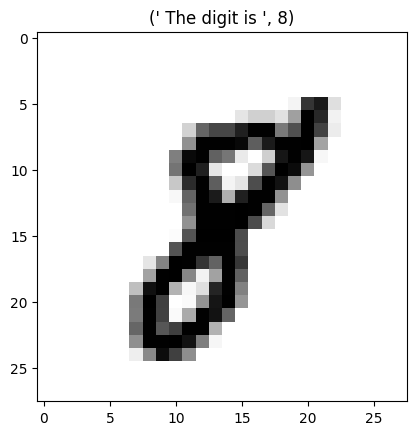

In [8]:
# print the digit
plt.imshow(x_train[13], cmap='binary')
label = y_train[13]
title1 = " The digit is ", label
plt.title(title1)
plt.show()


In [9]:
# specify the dimension of each image
img_rows , img_cols = 28,28
# batch size , number of classes , epoch
batch_size = 128
num_classes = 10
epoch = 12


In [10]:
#reshape train and test
x_train =x_train.reshape(x_train.shape[0],img_rows, img_cols , 1) # 1 channnel for grey scale image
x_test = x_test.reshape(x_test.shape[0],img_rows, img_cols , 1) # 1 channnel for grey scale image
print(x_train.shape)
print(x_test.shape)

(20000, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
# labels have to converted to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(20000, 10)
(10000, 10)


In [12]:
y_train[2]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
# check data type of x_test
x_test.dtype, x_train.dtype

(dtype('uint8'), dtype('uint8'))

In [14]:
# convert int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalise 0-255 , 0-1
x_train /= 255
x_test /=255

In [18]:
# Build the Model
input_shape = (img_rows,img_cols,1)
model = Sequential()
# first input layer
model.add(Conv2D(32 , kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape))

# second convolution layer
model.add(Conv2D(64 , kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# Flatten and add one fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# output layer , multiclass classification : softmax
model.add(Dense(num_classes, activation ='softmax'))

model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                      

In [16]:
input_shape

(28, 28, 1)

In [20]:
# compile the model
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [21]:
# fit the model , train the model
model.fit( x_train, y_train,
          batch_size=batch_size,
          epochs=epoch,
          verbose=1,
          validation_data=(x_test,y_test))

Epoch 1/12
157/157 [==============================] - 61s 373ms/step - loss: 2.2779 - accuracy: 0.1479 - val_loss: 2.2920 - val_accuracy: 0.1226
Epoch 2/12
157/157 [==============================] - 53s 338ms/step - loss: 2.2376 - accuracy: 0.2326 - val_loss: 2.2804 - val_accuracy: 0.1953
Epoch 3/12
157/157 [==============================] - 53s 339ms/step - loss: 2.1940 - accuracy: 0.3216 - val_loss: 2.2685 - val_accuracy: 0.2095
Epoch 4/12
157/157 [==============================] - 55s 351ms/step - loss: 2.1481 - accuracy: 0.4056 - val_loss: 2.2554 - val_accuracy: 0.2135
Epoch 5/12
157/157 [==============================] - 57s 366ms/step - loss: 2.0966 - accuracy: 0.4598 - val_loss: 2.2410 - val_accuracy: 0.2175
Epoch 6/12
157/157 [==============================] - 57s 366ms/step - loss: 2.0405 - accuracy: 0.4990 - val_loss: 2.2241 - val_accuracy: 0.2243
Epoch 7/12
157/157 [==============================] - 54s 347ms/step - loss: 1.9813 - accuracy: 0.5179 - val_loss: 2.2047 - val_ac

In [22]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 6s 20ms/step - loss: 2.0454 - accuracy: 0.2801


[2.0454390048980713, 0.2800999879837036]

In [23]:
print(model.metrics_names)

['loss', 'accuracy']
